In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

results_path = "/home/antoniu/Desktop/MFI_git/MFI/results_plot"
path = "/home/antoniu/Desktop/MFI_git/MFI"
os.chdir(path)

from pyMFI import MFI
from pyMFI import run_plumed

from matplotlib import rc
plt.rcParams.update({ "text.usetex": True, "font.family": "serif", "font.serif": ["computer modern roman"], "font.size": 14})
plw = 0.6
pcs = 3
pms = 3
bfillc = [0.9,0.9,0.9]
plt.rcParams['axes.linewidth'] = plw
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = plw
plt.rcParams['xtick.minor.width'] = plw
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.major.size'] = 4.5
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.major.width'] = plw
plt.rcParams['ytick.minor.width'] = plw
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.major.size'] = 5
plt.rcParams["figure.figsize"] = (5,4)


# Plot 1 - 1 simulation and a second simulation patched

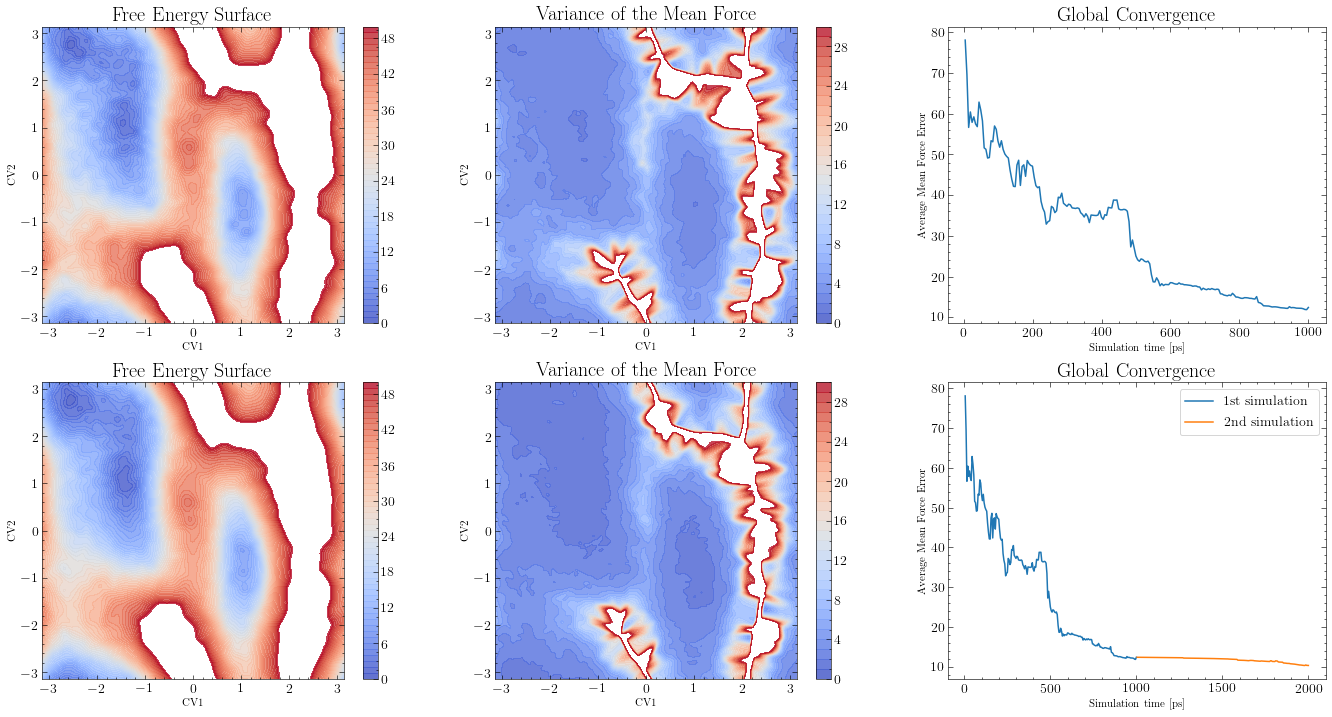

In [32]:
#Load force terms
Ftot_master = []
with open(results_path + "/alanine_dipeptide_500K.pkl", "rb") as fr:
    Ftot_master.append(pickle.load(fr))

[X, Y, Ftot_den, Ftot_x, Ftot_y, ofe, ofe_history_time, ofe_history, Ftot_den2, ofv_x, ofv_y] = Ftot_master[-1]
#integration with the FFT method
[X, Y, FES] = MFI.FFT_intg_2D(Ftot_x, Ftot_y)

FES_lim = 51
ofe_map_lim = 31

plt.rcParams["figure.figsize"] = (23,12)
plt.subplot(2,3,1)
plt.contourf(X, Y, FES, levels=range(0, FES_lim, 1), cmap='coolwarm', antialiased=False, alpha=0.8)
plt.ylabel('CV2', fontsize=11)
plt.xlabel('CV1', fontsize=11)
plt.title('Free Energy Surface', fontsize=20)
plt.colorbar()

plt.subplot(2,3,2)
plt.contourf(X, Y, ofe, levels=range(0, ofe_map_lim, 1), cmap='coolwarm', antialiased=False, alpha=0.8)
plt.ylabel('CV2', fontsize=11)
plt.xlabel('CV1', fontsize=11)
plt.title('Variance of the Mean Force', fontsize=20)
plt.colorbar()


plt.subplot(2,3,3)
plt.plot(ofe_history_time, ofe_history)
plt.ylabel('Average Mean Force Error', fontsize=11)
plt.xlabel('Simulation time [ps]', fontsize=11)
plt.title('Global Convergence', fontsize=20)



#Load force terms
Ftot_master = []
with open(results_path + "/alanine_dipeptide_patch2.pkl", "rb") as fr:
    Ftot_master.append(pickle.load(fr))
    
[X, Y, Ftot_den, FES, Ftot_den, ofe, ofe_history_old, ofe_history_time_old, ofe_history_time, ofe_history] = Ftot_master[-1]

plt.subplot(2,3,4)
plt.contourf(X, Y, FES, levels=range(0, FES_lim, 1), cmap='coolwarm', antialiased=False, alpha=0.8)
plt.ylabel('CV2', fontsize=11)
plt.xlabel('CV1', fontsize=11)
plt.title('Free Energy Surface', fontsize=20)
plt.colorbar()

plt.subplot(2,3,5)
plt.contourf(X, Y, ofe, levels=range(0, ofe_map_lim, 1), cmap='coolwarm', antialiased=False, alpha=0.8)
plt.ylabel('CV2', fontsize=11)
plt.xlabel('CV1', fontsize=11)
plt.title('Variance of the Mean Force', fontsize=20)
plt.colorbar()


plt.subplot(2,3,6)
plt.plot(ofe_history_time_old, ofe_history_old, label="1st simulation")
plt.plot(ofe_history_time, ofe_history, label="2nd simulation")
plt.ylabel('Average Mean Force Error', fontsize=11)
plt.xlabel('Simulation time [ps]', fontsize=11)
plt.title('Global Convergence', fontsize=20)
plt.legend()
plt.savefig('/home/antoniu/Desktop/Windows/results_1b.png', dpi=600, bbox_inches='tight')

plt.show()

plt.rcParams["figure.figsize"] = (5,4)


In [34]:
min_grid=np.array((-np.pi, -np.pi))

print(type(min_grid[1]))

<class 'numpy.float64'>


# Plot 2 - 1 long simulation vs. 10 short simulations

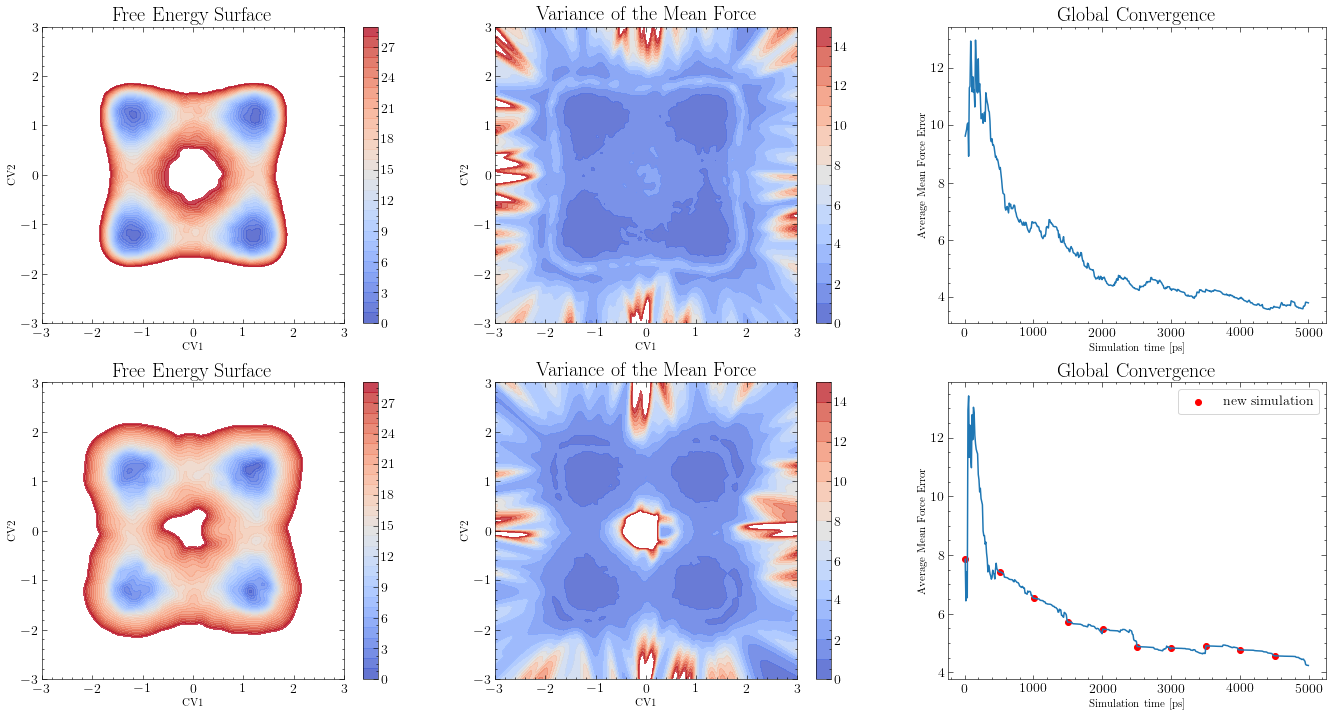

In [30]:
#Load force terms
Ftot_master = []
with open(results_path + "/bjola_pot_1M.pkl", "rb") as fr:
    Ftot_master.append(pickle.load(fr))

[X, Y, Ftot_den, Ftot_x, Ftot_y, ofe, ofe_history, ofe_history_time, Ftot_den2, ofv_x, ofv_y] = Ftot_master[-1]

[X, Y, FES] = MFI.FFT_intg_2D(Ftot_x, Ftot_y, min_grid=np.array((-3, -3)), max_grid=np.array((3, 3)), nbins=np.array((200, 200)))

FES_lim = 30
ofe_map_lim = 16

plt.rcParams["figure.figsize"] = (23,12)
plt.subplot(2,3,1)
plt.contourf(X, Y, FES, levels=range(0, FES_lim, 1), cmap='coolwarm', antialiased=False, alpha=0.8)
plt.ylabel('CV2', fontsize=11)
plt.xlabel('CV1', fontsize=11)
plt.title('Free Energy Surface', fontsize=20)
plt.colorbar()

plt.subplot(2,3,2)
plt.contourf(X, Y, ofe, levels=range(0, ofe_map_lim, 1), cmap='coolwarm', antialiased=False, alpha=0.8)
plt.ylabel('CV2', fontsize=11)
plt.xlabel('CV1', fontsize=11)
plt.title('Variance of the Mean Force', fontsize=20)
plt.colorbar()


plt.subplot(2,3,3)
plt.plot(ofe_history_time, ofe_history)
plt.ylabel('Average Mean Force Error', fontsize=11)
plt.xlabel('Simulation time [ps]', fontsize=11)
plt.title('Global Convergence', fontsize=20)


#Load force terms
Ftot_master = []
with open(results_path + "/bjola_pot_multisim.pkl", "rb") as fr:
    Ftot_master.append(pickle.load(fr))

[X, Y, Ftot_den, Ftot_x, Ftot_y, ofe, ofe_history_patch_time, ofe_history_patch, sim_start, sim_start_error, Ftot_den2, ofv_x, ofv_y] = Ftot_master[-1]

[X, Y, FES] = MFI.FFT_intg_2D(Ftot_x, Ftot_y, min_grid=np.array((-3, -3)), max_grid=np.array((3, 3)), nbins=np.array((200, 200)))



plt.subplot(2,3,4)
plt.contourf(X, Y, FES, levels=range(0, FES_lim, 1), cmap='coolwarm', antialiased=False, alpha=0.8)
plt.ylabel('CV2', fontsize=11)
plt.xlabel('CV1', fontsize=11)
plt.title('Free Energy Surface', fontsize=20)
plt.colorbar()

plt.subplot(2,3,5)
plt.contourf(X, Y, ofe, levels=range(0, ofe_map_lim, 1), cmap='coolwarm', antialiased=False, alpha=0.8)
plt.ylabel('CV2', fontsize=11)
plt.xlabel('CV1', fontsize=11)
plt.title('Variance of the Mean Force', fontsize=20)
plt.colorbar()


plt.subplot(2,3,6)
plt.plot(ofe_history_patch_time, ofe_history_patch)
plt.scatter(sim_start, sim_start_error, c="r", label="new simulation")
plt.ylabel('Average Mean Force Error', fontsize=11)
plt.xlabel('Simulation time [ps]', fontsize=11)
plt.title('Global Convergence', fontsize=20)
plt.legend()
plt.savefig('/home/antoniu/Desktop/Windows/results_2.png', dpi=600, bbox_inches='tight')

plt.show()

plt.rcParams["figure.figsize"] = (5,4)

# Plot 3 - MetaD with static bias

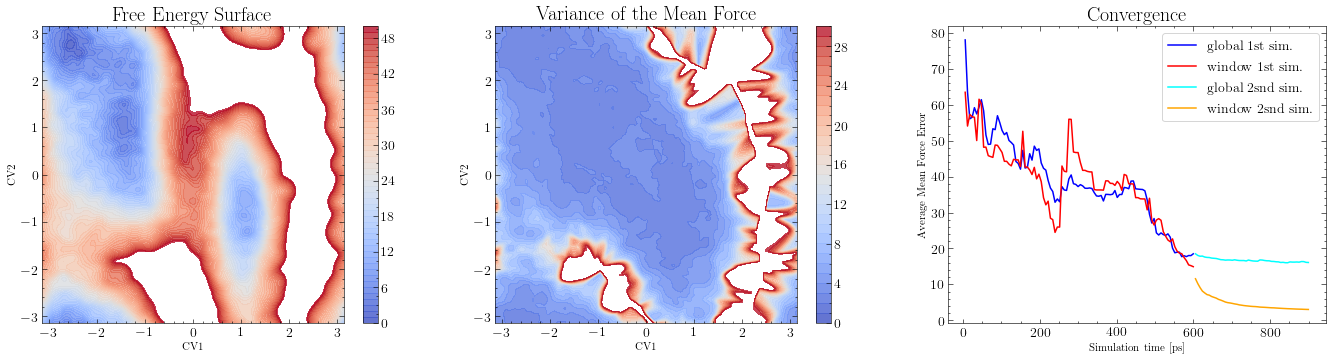

In [38]:
# #Load force terms
# Ftot_master = []
# with open(results_path + "/bjola_pot_1M.pkl", "rb") as fr:
#     Ftot_master.append(pickle.load(fr))

# [X, Y, Ftot_den, Ftot_x, Ftot_y, ofe, ofe_history, ofe_history_time, Ftot_den2, ofv_x, ofv_y] = Ftot_master[-1]

# [X, Y, FES] = MFI.FFT_intg_2D(Ftot_x, Ftot_y, min_grid=np.array((-3, -3)), max_grid=np.array((3, 3)), nbins=np.array((200, 200)))

FES_lim = 30
ofe_map_lim = 16

plt.rcParams["figure.figsize"] = (23,12)
# plt.subplot(2,3,1)
# plt.contourf(X, Y, FES, levels=range(0, FES_lim, 1), cmap='coolwarm', antialiased=False, alpha=0.8)
# plt.ylabel('CV2', fontsize=11)
# plt.xlabel('CV1', fontsize=11)
# plt.title('Free Energy Surface', fontsize=20)
# plt.colorbar()

# plt.subplot(2,3,2)
# plt.contourf(X, Y, ofe, levels=range(0, ofe_map_lim, 1), cmap='coolwarm', antialiased=False, alpha=0.8)
# plt.ylabel('CV2', fontsize=11)
# plt.xlabel('CV1', fontsize=11)
# plt.title('Variance of the Mean Force', fontsize=20)
# plt.colorbar()


# plt.subplot(2,3,3)
# plt.plot(ofe_history_time, ofe_history)
# plt.ylabel('Average Mean Force Error', fontsize=11)
# plt.xlabel('Simulation time [ps]', fontsize=11)
# plt.title('Global Convergence', fontsize=20)


    
#Load force terms
with open(results_path + "/alanine_dipeptide_static_patch.pkl", "rb") as fr:
    [X, Y, Ftot_den, FES, Ftot_den, ofe, ofe_history_time_old, ofe_history_old, ofe_history_window_old, ofe_history_time, ofe_history, ofe_history_window] = pickle.load(fr)

FES_lim = 51
ofe_map_lim = 31

plt.subplot(2,3,4)
plt.contourf(X, Y, FES, levels=range(0, FES_lim, 1), cmap='coolwarm', antialiased=False, alpha=0.8)
plt.ylabel('CV2', fontsize=11)
plt.xlabel('CV1', fontsize=11)
plt.title('Free Energy Surface', fontsize=20)
plt.colorbar()

plt.subplot(2,3,5)
plt.contourf(X, Y, ofe, levels=range(0, ofe_map_lim, 1), cmap='coolwarm', antialiased=False, alpha=0.8)
plt.ylabel('CV2', fontsize=11)
plt.xlabel('CV1', fontsize=11)
plt.title('Variance of the Mean Force', fontsize=20)
plt.colorbar()


plt.subplot(2,3,6)
plt.plot(ofe_history_time_old, ofe_history_old, c="blue", label="global 1st sim.")
plt.plot(ofe_history_time_old, ofe_history_window_old, c="red", label="window 1st sim.")
plt.plot(ofe_history_time, ofe_history, c="cyan", label="global 2snd sim.")
plt.plot(ofe_history_time, ofe_history_window, c="orange", label="window 2snd sim.")
plt.ylabel('Average Mean Force Error', fontsize=11)
plt.xlabel('Simulation time [ps]', fontsize=11)
plt.title('Convergence', fontsize=20)
plt.legend()
# plt.savefig('/home/antoniu/Desktop/Windows/results_2.png', dpi=600, bbox_inches='tight')

plt.show()

plt.rcParams["figure.figsize"] = (5,4)